# Exercise 19 – Working with Linear Models

### Introduction

The learning goals for this script are as follows:

- further practice and understand linear models
- use them for predictions, and
- investigate problems that arise from using summary data

To achieve these goals we will spend today’s class with data collected from the Old Faithful geyser.

A data frame about the Old Faithful geyser is preinstalled in R. You can load it into your environment by typing

In [1]:
data(faithful)

In [3]:
str(faithful)

'data.frame':	272 obs. of  2 variables:
 $ eruptions: num  3.6 1.8 3.33 2.28 4.53 ...
 $ waiting  : num  79 54 74 62 85 55 88 85 51 85 ...


The data contains observations of two variables:

- Eruption duration times in mins, and
- Corresponding waiting times until the next eruption in mins.

Rangers in Yellowstone National Park use data observations of this type to make daily predictions about the time of the next eruption for tourists.

In other words, they use the duration of an eruption to predict the waiting time until the next eruption.

### Step 1: Data Analysis of Ranger Profession
Let’s explore the data analysis part of the ranger profession.

- As usual, have a look at the data to come up with an idea of how predictions of eruption times could be done.

- Would the mean or median be a good statistic for waiting time prediction?

- Check if necessary conditions for the method you plan to use are met.

In [5]:
head(faithful)

eruptions,waiting
3.600,79
1.800,54
3.333,74
2.283,62
4.533,85
2.883,55


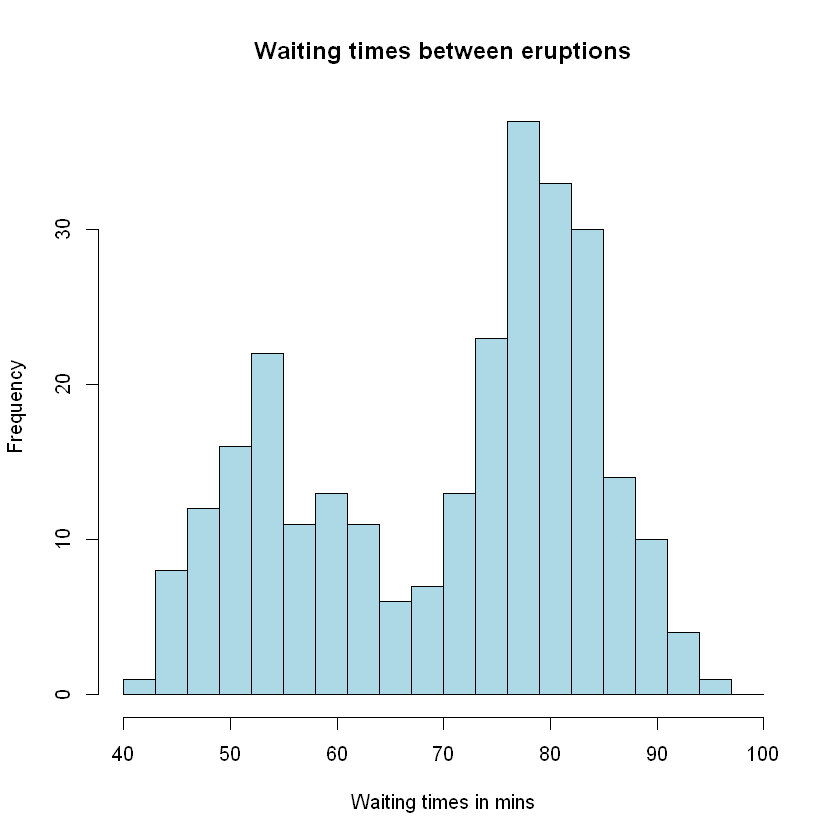

In [6]:
hist(faithful$waiting,
    breaks = seq(40,100,3),
    col = "lightblue",
    main = "Waiting times between eruptions",
    xlab = "Waiting times in mins")

- The distribution of waiting times appears to be bimodal.

- The mean or median would be good statistics for average waiting time if the distribution was, say, close to a normal distribution. Here it would however be more accurate to say that waiting times between eruptions are either around 80 mins or around 55 mins.

- What can we say beyond that?

- Can the duration of a current eruption help to explain the time interval between that eruption and the next eruption?

- Is it reasonable to use a linear model for inference of waiting times from an observed eruption duration?

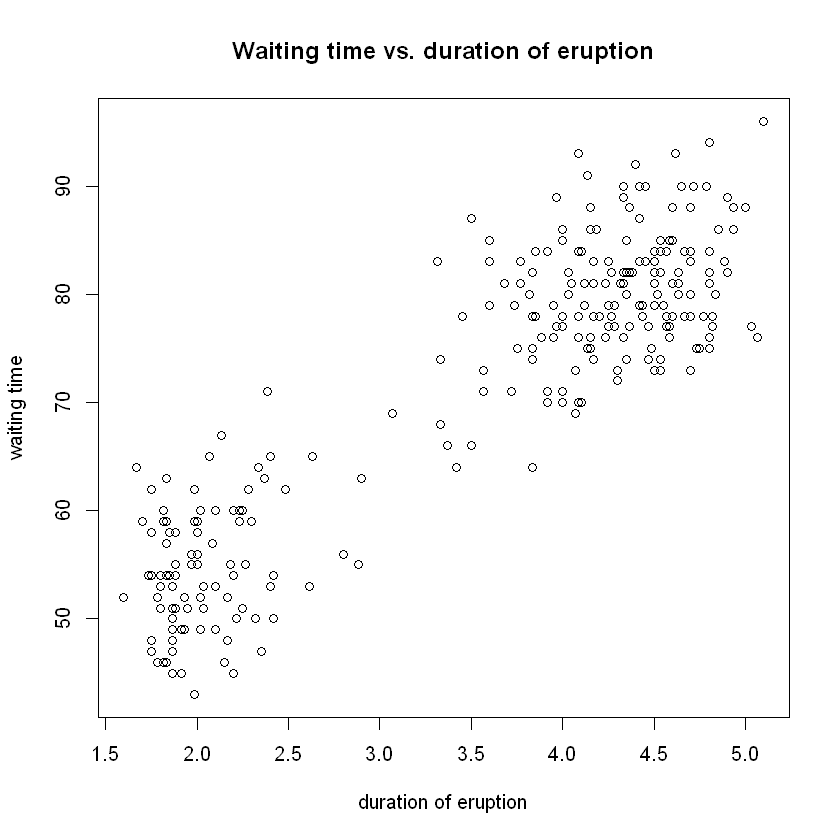

In [7]:
plot(waiting ~ eruptions, 
     data = faithful,  
     main = "Waiting time vs. duration of eruption",
     xlab = "duration of eruption", 
     ylab = "waiting time")

### Step 2: Fit a Linear Model

Does the ‘straight enough condition’ seem to be satisfied in the scatterplot? Are there outliers?

- To see whether eruption duration (x) can be used to predict waiting times till the next eruption (y), fit a linear model.

- Describe the linear equation for the model and the summary statistic R2.

In [8]:
geyserlm <- lm(waiting ~ eruptions, data = faithful)
coef(geyserlm) 

(Intercept)   eruptions 
   33.47440    10.72964

In [9]:
summary(geyserlm)$r.squared 

[1] 0.8114608

While the R2 of 81% says nothing about causality it indicates that the waiting time till the next eruption is much accounted for by the duration of the previous eruption. Here 81% of the variation in the waiting time is explained by the eruption duration.

### Step 3: Check whether the R2 value you just calculated is really the square of the correlation coefficient r between x and y.

In [10]:
summary(geyserlm)$r.squared

[1] 0.8114608

In [11]:
cor(faithful$eruptions, faithful$waiting)^2

[1] 0.8114608

It is not surprising that R2 and r should be related:

- r describes how strong two variables are correlated

- R2 describes how well the data is explained for by the model.

### Step 4: Add a line of best fit to the scatter plot
Add the line of best fit to your scatterplot.

Do you think that the duration of eruption can be used to predict the waiting time to the next eruption via the linear model you just calculated?

Beyond the inspection of the model fit and of R2 just done, base your answer on assessing whether the conditions on the residuals are met.

- Check the plot of the residuals against either the predictor (x) or the fitted values stored in your linear model.

- Check whether the residuals have a Normal-distribution.

- What plots should you use? What should you look out for in those plots?

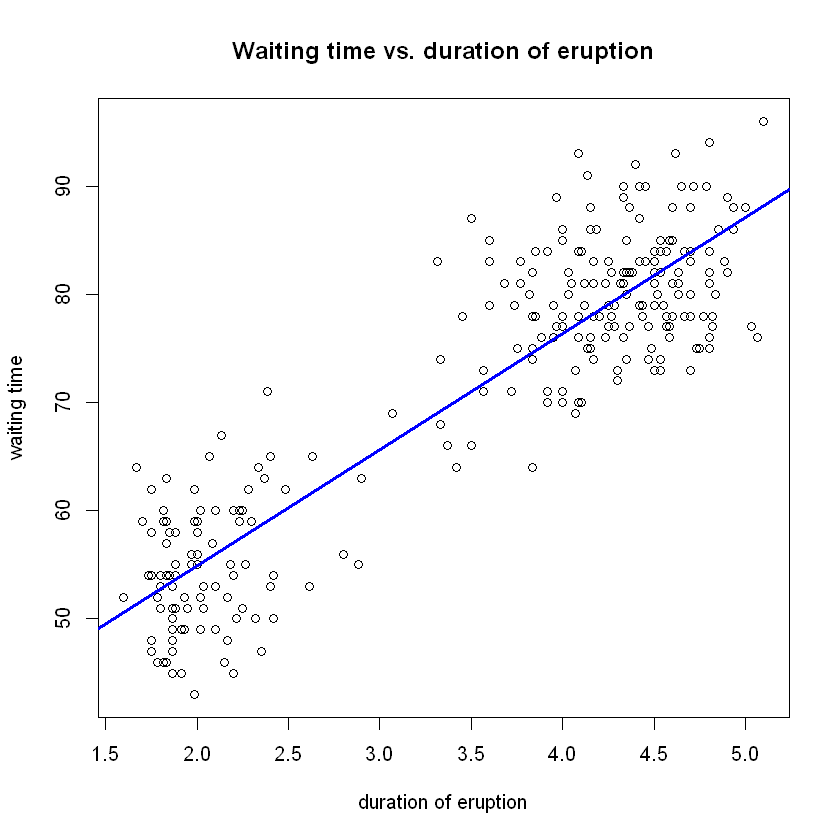

In [12]:
plot(waiting ~ eruptions, 
     data = faithful,  
     main = "Waiting time vs. duration of eruption",
     xlab = "duration of eruption", 
     ylab = "waiting time")

abline(geyserlm, col = "blue", lwd = 3) 

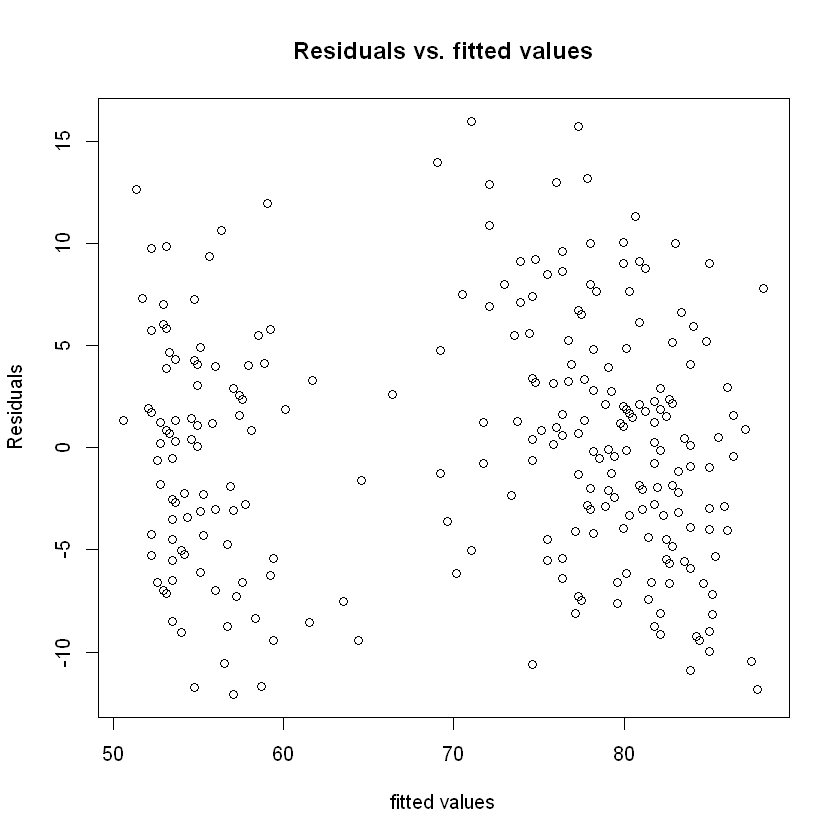

In [13]:
plot(residuals(geyserlm) ~ predict(geyserlm),  
     xlab = "fitted values", 
     ylab='Residuals', 
     main = "Residuals vs. fitted values")

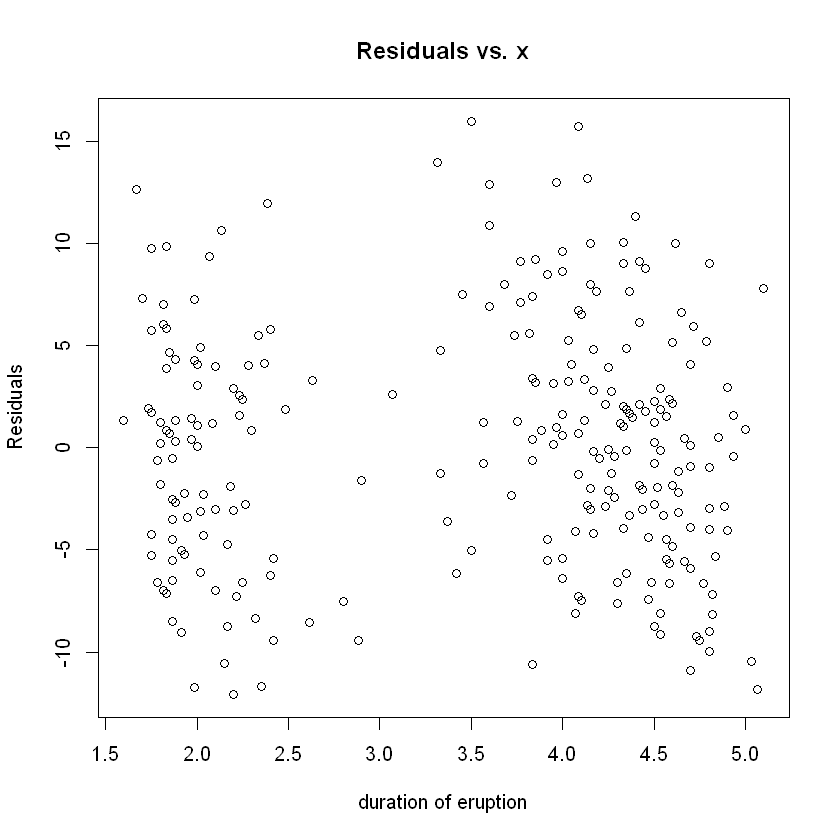

In [15]:
plot(residuals(geyserlm) ~ faithful$eruptions, 
     xlab = "duration of eruption",
     ylab='Residuals', 
     main = "Residuals vs. x")

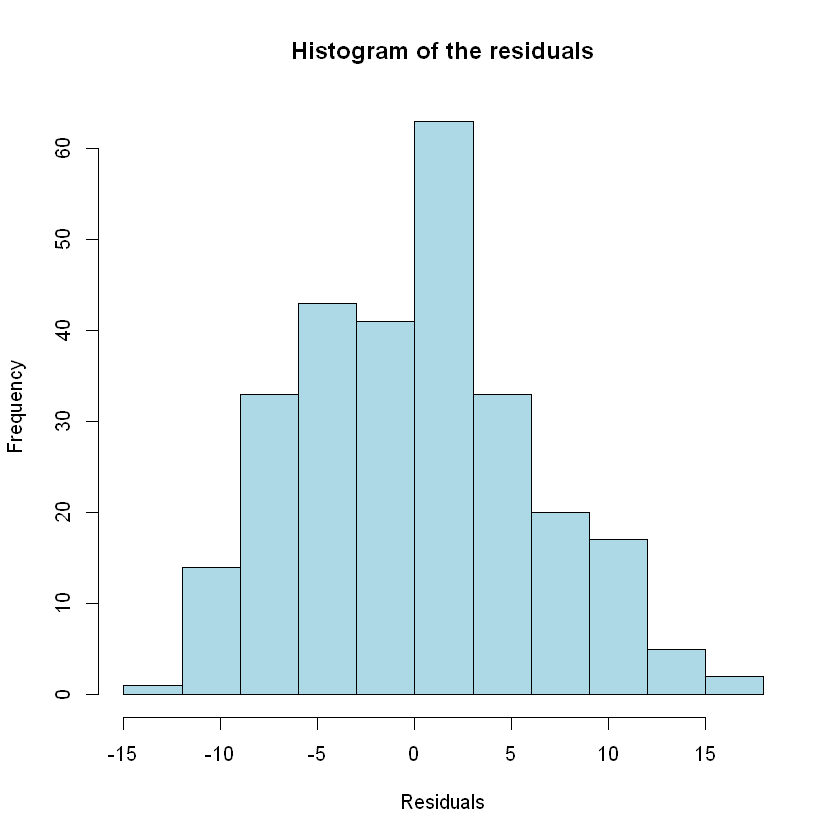

In [16]:
hist(residuals(geyserlm), 
     breaks=seq(-15,20,3), 
     col="lightblue",  
     main = "Histogram of the residuals", 
     xlab = "Residuals")

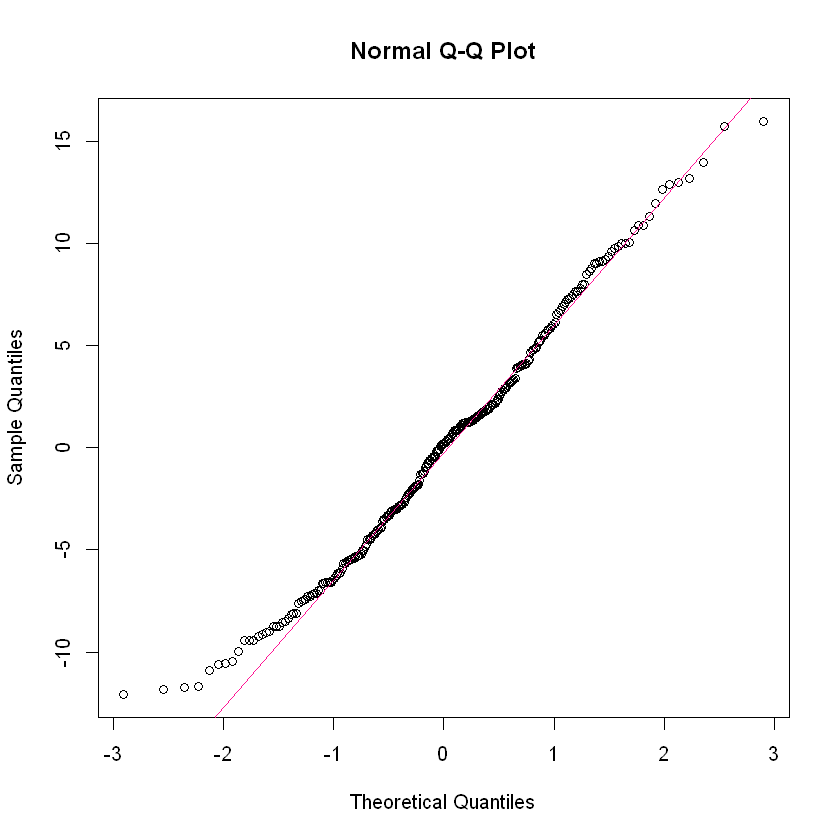

In [17]:
qqnorm(residuals(geyserlm)) 
qqline(residuals(geyserlm), col="deeppink")

## Evaluation
- Linear model fits the relationship well. Large R2 suggests duration of eruption is highly associated with waiting time till next eruption.

- Linearity conditions are also verified by inspection of the residual plot: It does not notably bend nor “thicken”, suggesting that the variation is constant throughout the range of x.

- The two residual scatterplots look identical since the fitted value is a linear transformation of the waiting time.

- Neither the scatter plot nor the residual plot show notable outliers.

- In the qq-plot of the residuals there appears to be some deviation from normality in the left tail.

- It doesn’t look like any transformation of the data is needed.

### More Evaluation

- In a linear regression we associate y (here waiting time) with x (here previous eruption duration).

- Some reasons causing longer or shorter waiting times are left in the residual.

- If those reasons are not just random fluctuations, this would mean that some explanatory information was still left in the residual. It would mean there is something beyond the linear relationship that potentially could also be included in the model, e.g. another variable we didn’t consider, a term or transformation to model a curve, etc.

- If, however, those other reasons are essentially random, then the residual plot should look like scatter with no structure.

- Then isn’t it enough to only quickly check that the residuals and x have no correlation?

In [18]:
cor(residuals(geyserlm), predict(geyserlm))

[1] 7.894773e-18

No! After fitting the linear model, the residual and the fitted values are always completely uncorrelated.

This is because R has fitted the best possible linear model and thus no “linear model” explanatory component is left in the residuals.

### Step 5: Predict the waiting times for the ranger
Based on your linear model, what waiting times should the ranger anounce on the tourist boards after she observed eruption durations of 2.25, 4.1, or 4.72 minutes?

In [19]:
measurements <- data.frame(eruptions = c(2.25,4.1,4.72))
predict(geyserlm, newdata = measurements)

1        2        3 
57.61609 77.46593 84.11830

### Step 6: Flip the roles of x and y variables into the linear model
Find out which parts of the output would change, and which won't.

In [20]:
geyserlm2 <- lm(eruptions ~ waiting, data = faithful)
coef(geyserlm2)

(Intercept)     waiting 
-1.87401599  0.07562795

In [21]:
summary(geyserlm2)$r.squared

[1] 0.8114608

While the slope and intercept of the linear model change, R2 stays the same as before.

This illustrates how the order of variables matters in linear regression but doesn’t in correlations.

Does this mean we can use the waiting time to predict the eruption duration?

Like telling tourists: “Just stay, – even if the announced waiting time is long. It will be worth your time since you will see a longer eruption.” ?

Well, – maybe… But not from the data that we just considered!

We need data about the

- eruption times and the

- corresponding waiting times before these respective eruptions.

Data of this type (in mins) is provided on Canvas for you to download:

In [24]:
faithful_pd <- read.csv("C:/Users/User/OneDrive/Documents/Yale-NUS/Quantitative Reasoning/Quantitative Reasoning Repository/Exercise 17 - Yellowstone National Park/faithful_AzzaliniBowman1990.csv")

### Step 7: Use the faithful_pd data to find out the waiting times between eruptions

- How much of the variance in eruption duration is explained by the waiting time between eruptions?

- Does this linear model have more or less explanatory power than the one we just considered?

- Perform the same assessment as for the previous linear model.

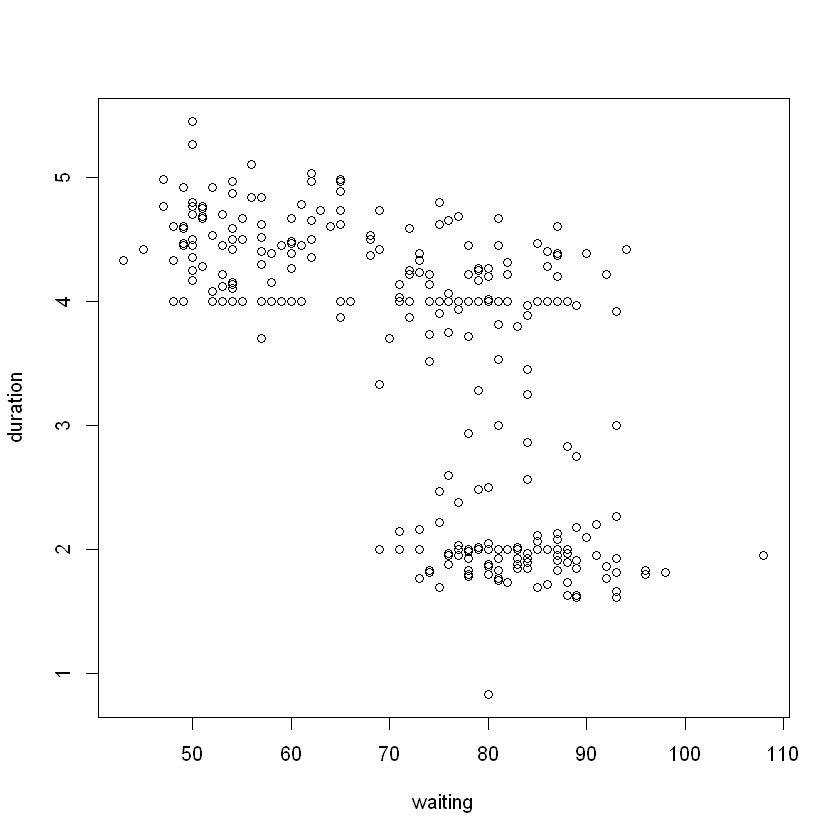

In [25]:
plot(duration ~ waiting, data = faithful_pd)

From the scatter plot we see that

- if one observes an eruption lasting about 2 mins, then one has probably waited 80 to 90 minutes from the last eruption to the current one.

- if one observes an eruption lasting around 4.5 mins, the waiting time could have been any time between around 50 and 90 mins.

- a short waiting time is always followed by a long eruption, but a long waiting time is followed by short or long eruptions in roughly equal proportions.

Such conclusions cannot be made from a linear model.

What happens when we assess the linear model?

In [26]:
cor(faithful_pd$duration, faithful_pd$waiting)

[1] -0.644623

The negative correlation indicates an inverse relationship between waiting time and eruption duration: the longer the eruption, the shorter the waiting time before the eruption.

### Step 8: Assess the fit
- Plot scatter plot and linear model

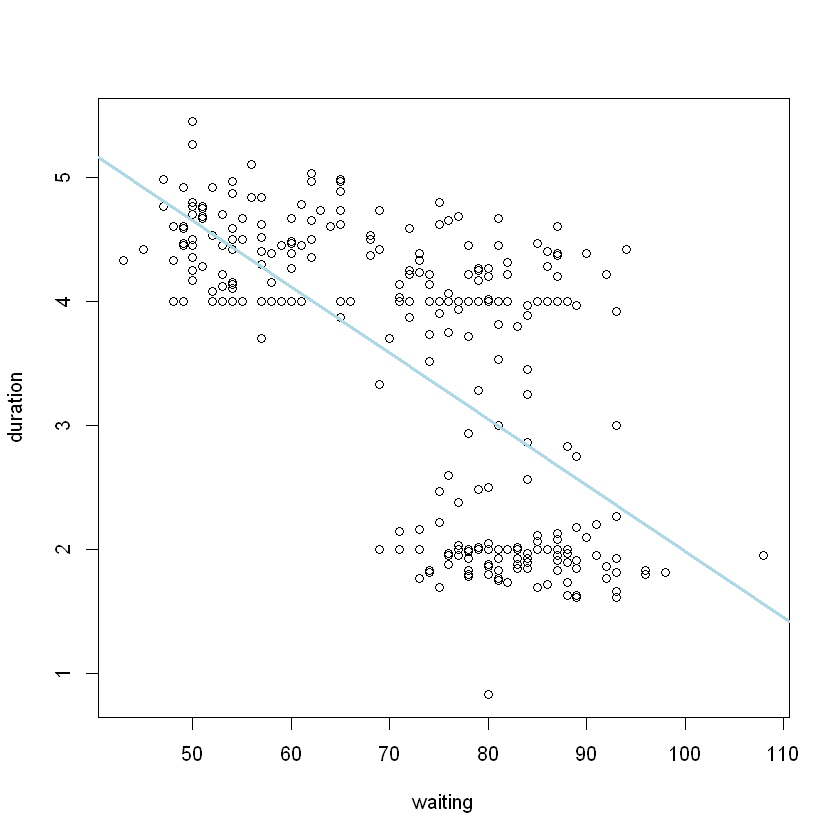

In [28]:
geyserlm_pd <- lm(duration ~ waiting, data = faithful_pd)

plot(duration ~ waiting, 
     data = faithful_pd)

abline(geyserlm_pd, 
       col = "lightblue", 
       lwd = 3) 

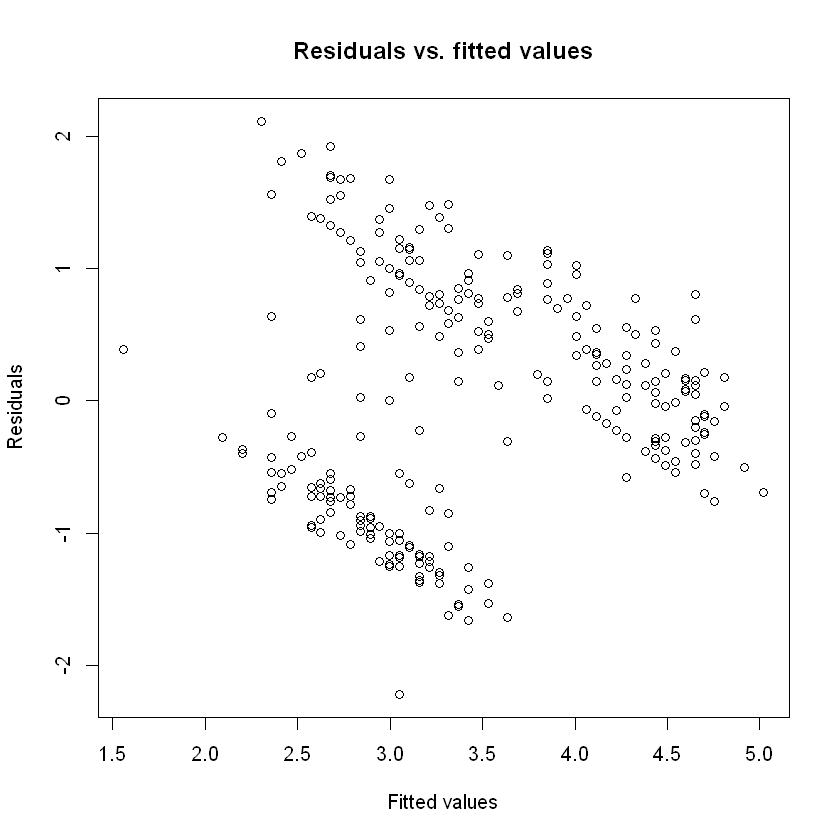

In [29]:
plot(residuals(geyserlm_pd) ~ predict(geyserlm_pd), 
     xlab = "Fitted values",
     ylab='Residuals', 
     main = "Residuals vs. fitted values")

In [30]:
cor(residuals(geyserlm_pd), predict(geyserlm_pd))

[1] -1.93951e-17

The correlation between residuals and predicted eruption durations is still zero!

This is just saying we fitted the best linear model and so no linear component is left in the residual. But we see from the plots that even the best among the linear models here cannot do that good.

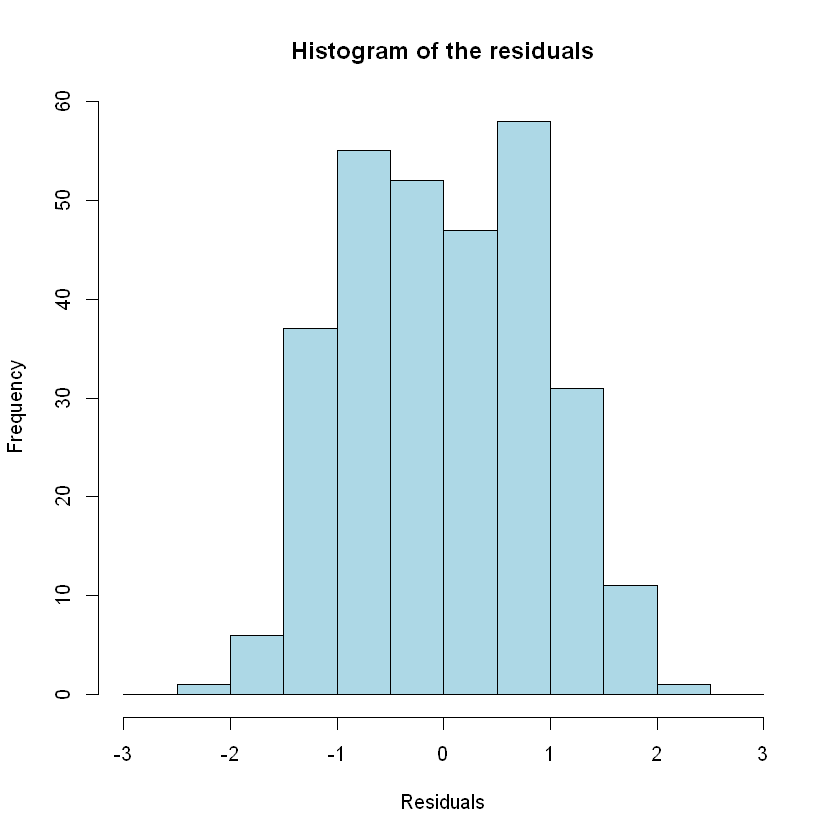

In [31]:
hist(geyserlm_pd$residuals, 
     breaks=seq(-3,3,0.5), 
     col="lightblue",  
     main = "Histogram of the residuals", 
     xlab = "Residuals")

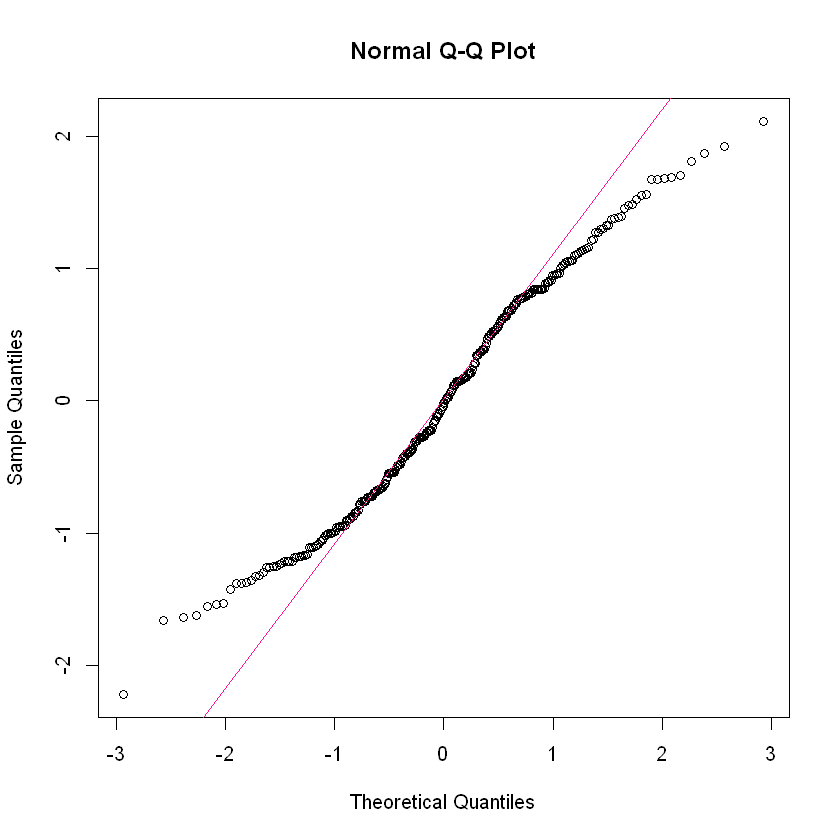

In [32]:
qqnorm(geyserlm_pd$residuals)
qqline(geyserlm_pd$residuals, col="deeppink")

Have you noticed the high proportion of eruptions lasting exactly 2 and exactly 4 mins in the data? Some rangers just indicated L for long and S for short eruptions.

### Step 9: Predicting eruption duration from summary data

Suppose a ranger wants to summarize the data even further by taking means of waiting times for eruption durations that fall within 0.1 mins intervals.

- First use the function round to append a new column to ‘faithful_pd’ containing the eruption durations rounded to one decimal place. (Hint: ?round)

- Then use aggregate to get the mean waiting times per duration bin.

- Finally, fit a linear model to this summarized data.

From a quick assessment, what seems to be problematic about working with summary data?

In [33]:
faithful_pd$duration_rounded <- round(faithful_pd$duration, 1) 

geyser_summarized <- aggregate(waiting ~ duration_rounded, 
                               data = faithful_pd, 
                               FUN = mean)
head(geyser_summarized)

duration_rounded,waiting
0.8,80.00000
1.6,89.75000
1.7,84.83333
1.8,84.57143
1.9,83.87500
2.0,81.44444


In [34]:
coef(lm(geyser_summarized))

(Intercept)     waiting 
 9.97540250 -0.08954986

In [35]:
summary(lm(geyser_summarized))$r.squared

[1] 0.7631904

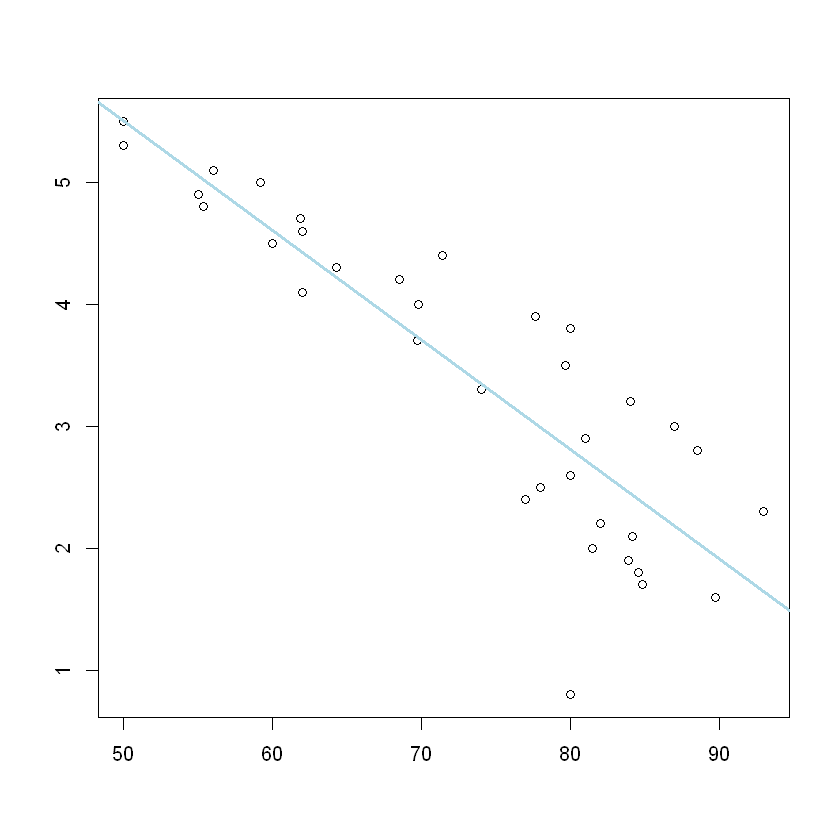

In [36]:
plot(geyser_summarized$duration_rounded ~ geyser_summarized$waiting, 
     xlab = "", 
     ylab='', 
     main = "")
abline(lm(geyser_summarized), col = "lightblue", lwd = 3) 

Can this really have helped to be able to better explain the eruption duration from the waiting time?!

While we have seen earlier that a linear model does not do well in predicting eruption duration from waiting time, when using summarized data it erroneously looks as if a linear model can now do much better!

This illustrates some important general points:

- To the extend possible, one should use raw data for analysis of relationships between variables.

- Using summary data reduces the variance and in regression analysis gives a false impression of how well the linear model fits the data.

- If sampling is uneven across the classes or bins in which the data is summarized, the estimated slope may well be wrong.